# Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
        save_to_dir = "AugmentedImages"
#         mkdir AugmentedImages
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1721 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.7388224  0.74666554 0.7976459 ]
  [0.7221007  0.7299438  0.7809242 ]
  [0.7362374  0.74408054 0.79506093]
  ...
  [0.55399746 0.5500759  0.6206641 ]
  [0.5460797  0.5421581  0.6127464 ]
  [0.538162   0.5342404  0.60482866]]

 [[0.7399811  0.74782425 0.79880464]
  [0.7224869  0.73033005 0.78131044]
  [0.73411316 0.7419563  0.7929367 ]
  ...
  [0.47846407 0.4745425  0.5451307 ]
  [0.4830989  0.47917733 0.5497655 ]
  [0.48773366 0.4838121  0.5544004 ]]

 [[0.74113977 0.7489829  0.7999633 ]
  [0.72287315 0.7307163  0.7816967 ]
  [0.7319888  0.7398319  0.7908123 ]
  ...
  [0.52944237 0.5255208  0.59610903]
  [0.5277043  0.52378273 0.59437096]
  [0.5259662  0.52204466 0.5926329 ]]

 ...

 [[0.5909429  0.5948645  0.6772174 ]
  [0.59287405 0.5967956  0.67914855]
  [0.59480524 0.5987268  0.68107975]
  ...
  [0.40778205 0.3999389  0.48229185]
  [0.45225218 0.44440904 0.526762  ]
  [0.4758415  0.46799836 0.55035126]]

 [[0.5878021  0.5917237  0.6740766 ]
  [0.5860641  0.58998567 0.6723386 ]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.67188597 0.6679644  0.73070955]
  [0.67404264 0.6701211  0.73286617]
  [0.6509804  0.64705884 0.70980394]
  ...
  [0.66684544 0.670767   0.74135524]
  [0.66643167 0.67035323 0.74094146]
  [0.66601783 0.6699394  0.74052763]]

 [[0.67105836 0.6671368  0.7298819 ]
  [0.6769393  0.67301774 0.73576283]
  [0.6509804  0.64705884 0.70980394]
  ...
  [0.66294575 0.6668673  0.7374556 ]
  [0.66317147 0.6666667  0.7372549 ]
  [0.663999   0.6666667  0.7372549 ]]

 [[0.6702308  0.66630924 0.72905433]
  [0.67803013 0.67410856 0.73685366]
  [0.6525381  0.64861655 0.7113617 ]
  ...
  [0.6701432  0.6666667  0.7372549 ]
  [0.6702057  0.66628414 0.7368724 ]
  [0.6693781  0.66545653 0.73604476]]

 ...

 [[0.34449297 0.3288067  0.39547336]
  [0.34490678 0.3292205  0.3958872 ]
  [0.3495486  0.33319473 0.40008396]
  ...
  [0.49831647 0.4828527  0.5495194 ]
  [0.376963   0.36519828 0.43186495]
  [0.4547125  0.4429478  0.5096145 ]]

 [[0.41099012 0.38542005 0.45538133]
  [0.41926613 0.39245465 0.4628297 ]


## Building the Model

In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
1506/32

47.0625

In [14]:
215/32 #32 is one batch size

6.71875

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 135s 3s/step - loss: 0.0394 - accuracy: 0.9853 - val_loss: 0.0488 - val_accuracy: 0.9740
Epoch 2/20
47/47 [==============================] - 159s 3s/step - loss: 0.0508 - accuracy: 0.9773 - val_loss: 0.1112 - val_accuracy: 0.9688
Epoch 3/20
47/47 [==============================] - 135s 3s/step - loss: 0.0616 - accuracy: 0.9753 - val_loss: 0.0577 - val_accuracy: 0.9740
Epoch 4/20
47/47 [==============================] - 189s 4s/step - loss: 0.0292 - accuracy: 0.9913 - val_loss: 0.0591 - val_accuracy: 0.9583
Epoch 5/20
47/47 [==============================] - 194s 4s/step - loss: 0.0238 - accuracy: 0.9893 - val_loss: 0.0584 - val_accuracy: 0.9792
Epoch 6/20
47/47 [==============================] - 200s 4s/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.1000 - val_accuracy: 0.9688
Epoch 7/20
47/47 [==============================] - 214s 5s/step - loss: 0.0254 - accuracy: 0.9900 - val_loss: 0.1158 - val_accuracy: 0.9740
Epoch 8/20
47

In [18]:
scores = model.evaluate(test_generator)

7/7 [==============================] - 5s 763ms/step - loss: 0.0919 - accuracy: 0.9815


In [19]:
scores

[0.09190923720598221, 0.9814814925193787]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [20]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [21]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [23]:
type(history.history['loss'])

list

In [24]:
len(history.history['loss'])

20

In [25]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.03943434730172157,
 0.05080311745405197,
 0.0616065189242363,
 0.029153862968087196,
 0.023768920451402664]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [27]:
val_acc

[0.9739583134651184,
 0.96875,
 0.9739583134651184,
 0.9583333134651184,
 0.9791666865348816,
 0.96875,
 0.9739583134651184,
 0.984375,
 0.9635416865348816,
 0.9791666865348816,
 0.9635416865348816,
 0.9791666865348816,
 0.984375,
 0.9791666865348816,
 0.9479166865348816,
 0.9739583134651184,
 0.9895833134651184,
 0.9375,
 0.984375,
 0.9895833134651184]

In [28]:
acc

[0.9853039383888245,
 0.9772878885269165,
 0.9752839207649231,
 0.9913159608840942,
 0.989311933517456,
 0.9913159608840942,
 0.9899799823760986,
 0.9859719276428223,
 0.9766198992729187,
 0.9866399168968201,
 0.9839679598808289,
 0.988696813583374,
 0.997327983379364,
 0.994655966758728,
 0.9926519989967346,
 0.994655966758728,
 0.9966755509376526,
 0.9873670339584351,
 0.9859719276428223,
 0.994655966758728]

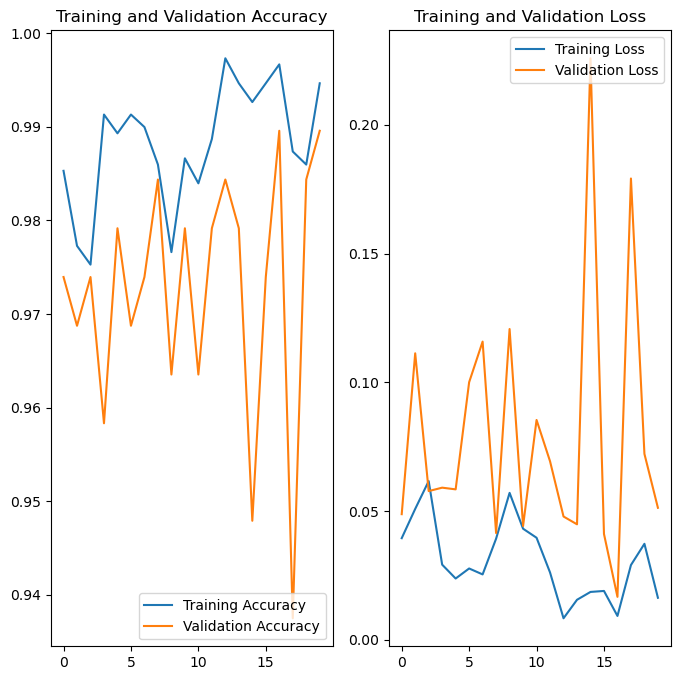

In [29]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 608ms/step
predicted label: Potato___Early_blight


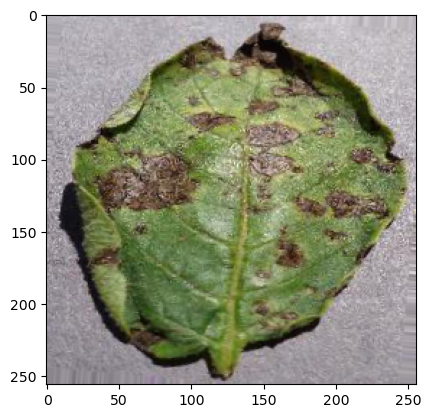

In [32]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [33]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 [==============================] - 0s 39ms/step


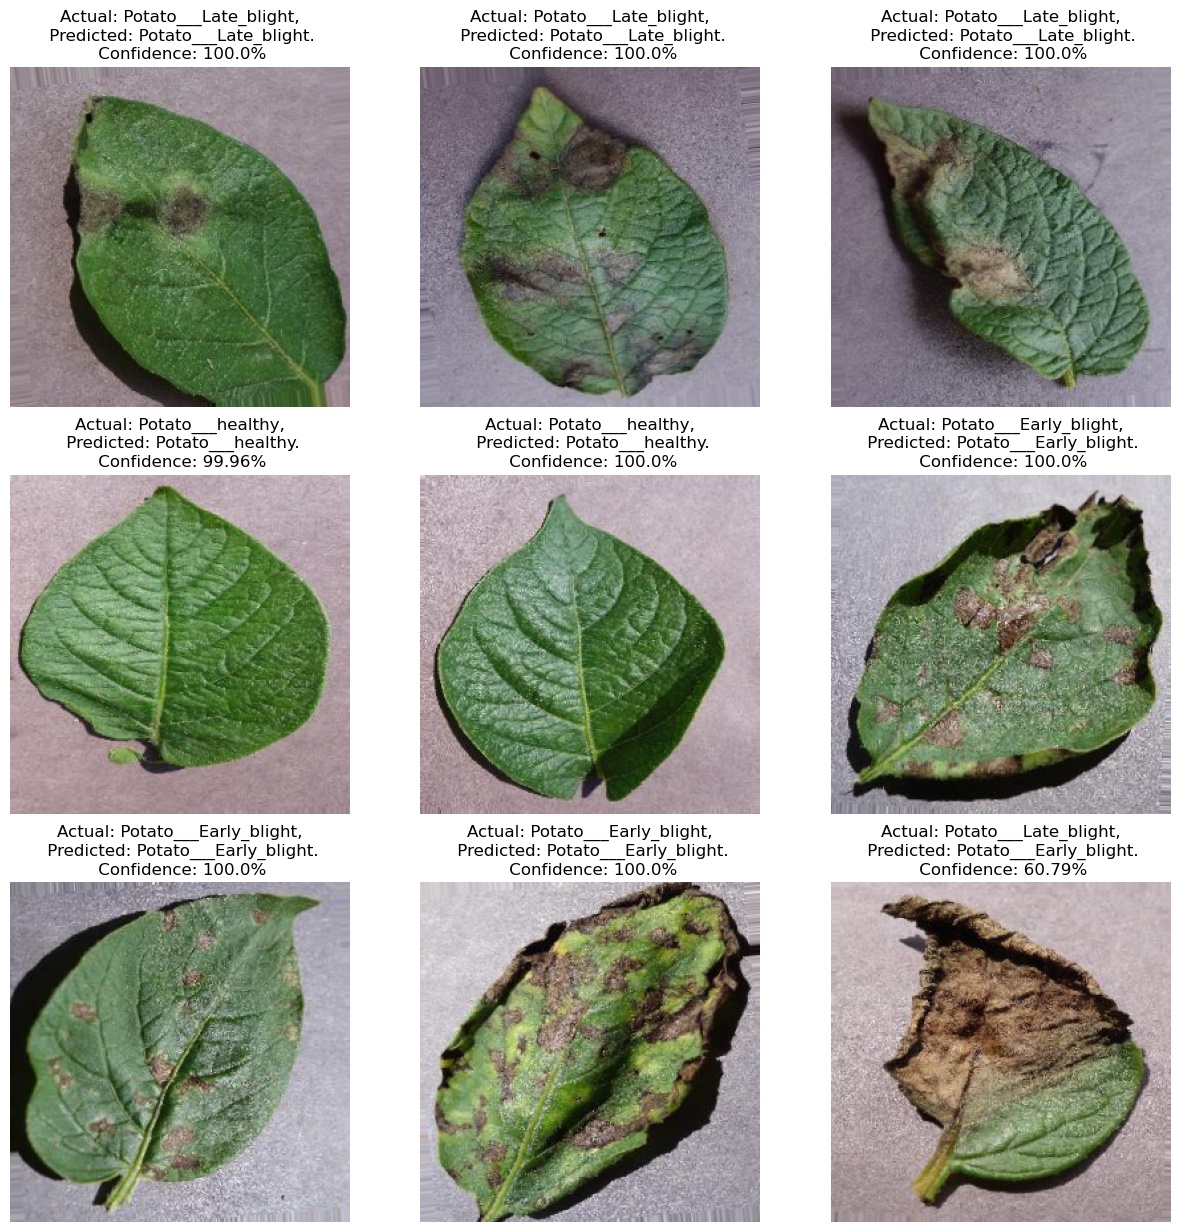

In [34]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [36]:
model.save("../potatoes.h5")